# Supermart Grocery sales analysis
### The detailed analysis about the sales of groceries in a supermart

In [1]:
"""
 import all the necessary modules
PANDAS for data analysis and processing
NUMPY for advances numerical calculations 
MATPLOTLIB for visualizing the data
SKLEARN for machine learning (we're using linear regression for this dataset)
"""

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Settings for packages
pd.set_option('display.max.columns',20)
pd.set_option('display.max.rows',2000)

In [3]:
# read and display the table

df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

df.head(15)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


## Data pre-processing using pandas

In [4]:
# check for empty cells and duplicates
df.drop_duplicates() # no duplicates found

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [5]:
df.isnull().sum() # No nulls in the database

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [6]:
# change every name of the customer name column into title() format. Just for my assurance
df['Customer Name'] = df['Customer Name'].str.title()

In [7]:
# checking each column for errors
"""
df['Category'].unique() - checked (no errors)
df['Sub Category'].unique() - checked (no errors)
df['City'].unique() - checked (no errors)
df['Region'].unique() - checked (no errors)
df['Sales'] - checked (no errors)
df['Discount'].unique() - checked (no errors)
df['Profit'] - checked (no errors)
df['State'].unique() - checked (no errors) 
"""

# df['Order Date'] - checked (needs formatting)

# Replace the '/' with '-' in the date string
df['Order Date'] = df['Order Date'].str.replace('/','-') 

# Change the datatype of the order date column from str to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
# split the date column into Year, Month and Day columns

df['Month'] = df['Order Date'].dt.month
df['yr_quarter'] = df['Order Date'].dt.quarter
df['Year'] = df['Order Date'].dt.year
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,yr_quarter,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,4,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,4,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,2,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,4,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,12,4,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,7,3,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6,2,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,10,4,2018


### Export the modified database

In [9]:
# Export the database into another csv file (i like to visualize in power BI - personal preference)

# df.to_csv('Supermart sales modified database.csv',index=True)

## EDA and Visualizations using matplotlib and seaborn

#### Top 5 cities for sales

,Sales,Profit
City,,
Kanyakumari,706764,172217.74
Vellore,676550,174073.01
Bodi,667177,173655.13
Tirunelveli,659812,165169.01
Perambalur,659738,171132.19


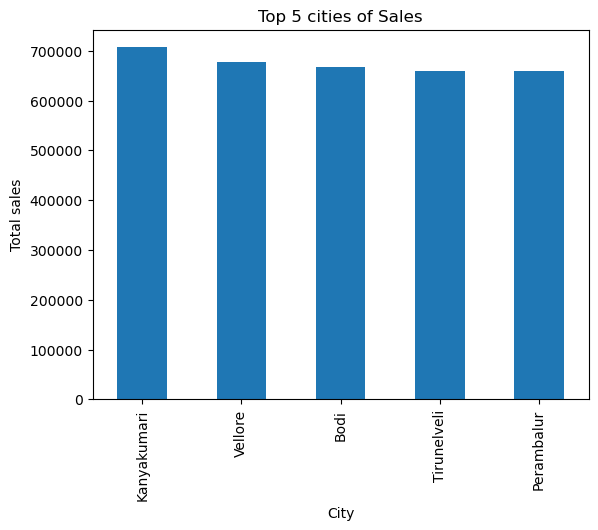

In [10]:
top_5_city = df.groupby('City')[['Sales','Profit']].sum(numeric_only=True).sort_values(by='Sales',ascending = False).head()
top_5_city['Sales'].plot.bar(ylabel = 'Total sales', title = 'Top 5 cities of Sales')
top_5_city

#### Sales dustribution - average, high and low margins

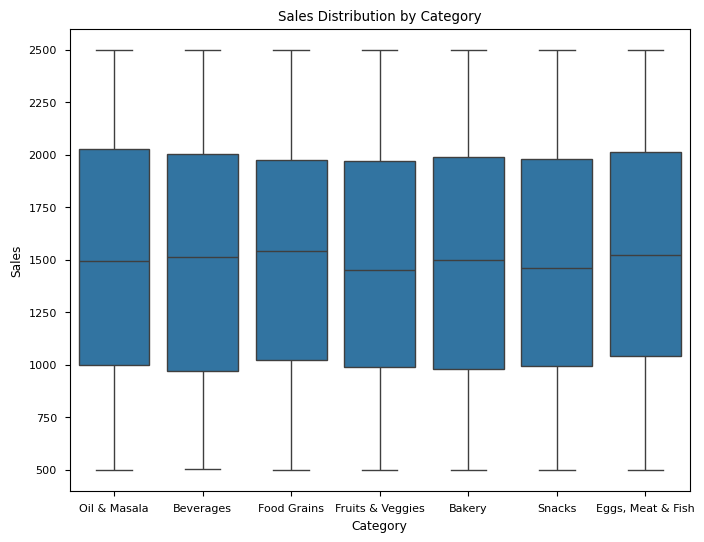

In [11]:
plt.style.use('seaborn-v0_8-paper')
plt.figure(figsize=(8,6))
sns.boxplot(data = df , x = 'Category', y = 'Sales')
plt.title('Sales Distribution by Category')
plt.show()


In [12]:
# create a copy of df into df2
df2 = df 

#### Heatmap for analysis of correlation between different categories

<Axes: >

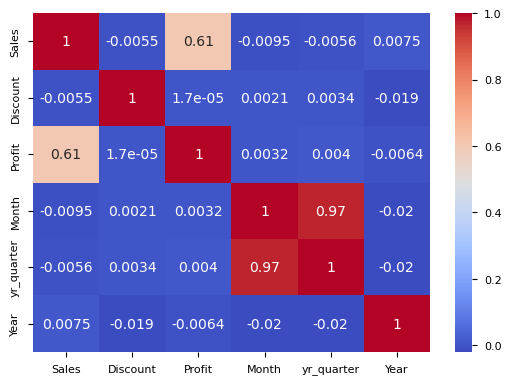

In [13]:
sns.heatmap(df2.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [14]:
# Encode the categorical values using LabelEncoder() function. it will create numeric values for each category of the column
# This step will make it easier for Machine learning algorithm to process the data

le = LabelEncoder()

df2['Category'] = le.fit_transform(df2['Category'])
df2['Sub Category'] = le.fit_transform(df2['Sub Category'])
df2['City'] = le.fit_transform(df2['City'])
df2['Region'] = le.fit_transform(df2['Region'])
df2['State'] = le.fit_transform(df2['State'])
df2['Month'] = le.fit_transform(df2['Month'])
df2['Customer Name'] = le.fit_transform(df2['Customer Name'])

# Apply cyclical encoding
df2['month_sin'] = np.sin(2 * np.pi * df2['Month'] / 12)
df2['month_cos'] = np.cos(2 * np.pi * df2['Month'] / 12)

In [15]:
# Database with encoded categorical values for each column
df2.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,yr_quarter,Year,month_sin,month_cos
0,OD1,12,5,14,21,2017-11-08,2,1254,0.12,401.28,0,10,4,2017,-0.866025,5.000000e-01
1,OD2,37,1,13,8,2017-11-08,3,749,0.18,149.80,0,10,4,2017,-0.866025,5.000000e-01
2,OD3,14,3,0,13,2017-06-12,4,2360,0.21,165.20,0,5,2,2017,0.500000,-8.660254e-01
3,OD4,15,4,12,4,2016-10-11,3,896,0.25,89.60,0,9,4,2016,-1.000000,-1.836970e-16
4,OD5,28,3,18,12,2016-10-11,3,2355,0.26,918.45,0,9,4,2016,-1.000000,-1.836970e-16
5,OD6,0,3,18,4,2015-06-09,4,2305,0.26,322.70,0,5,2,2015,0.500000,-8.660254e-01
6,OD7,17,4,12,20,2015-06-09,4,826,0.33,346.92,0,5,2,2015,0.500000,-8.660254e-01
7,OD8,11,4,11,15,2015-06-09,4,1847,0.32,147.76,0,5,2,2015,0.500000,-8.660254e-01
8,OD9,11,0,1,19,2015-06-09,4,791,0.23,181.93,0,5,2,2015,0.500000,-8.660254e-01
9,OD10,19,0,3,1,2015-06-09,4,1795,0.27,484.65,0,5,2,2015,0.500000,-8.660254e-01


## Preparing the data for Machine Learning 
#### To predict the 'Sales' values using all the other categories.
- Splitting data into training and testing sets
- scaling the feature set

In [37]:
# Select features and target variable
target = df2['Sales']
features = df2.drop(columns=['Order ID','Order Date','Customer Name','Sales','State'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2, random_state=42) 
# features(0:7995),features(7995:1999),Sales(7995),Sales(1999)


# Scale the feature set
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
features

,Category,Sub Category,City,Region,Discount,Profit,Month,yr_quarter,Year,month_sin,month_cos
0,5,14,21,2,0.12,401.28,10,4,2017,-8.660254e-01,5.000000e-01
1,1,13,8,3,0.18,149.80,10,4,2017,-8.660254e-01,5.000000e-01
2,3,0,13,4,0.21,165.20,5,2,2017,5.000000e-01,-8.660254e-01
3,4,12,4,3,0.25,89.60,9,4,2016,-1.000000e+00,-1.836970e-16
4,3,18,12,3,0.26,918.45,9,4,2016,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...
9989,2,9,9,4,0.16,359.10,11,4,2015,-5.000000e-01,8.660254e-01
9990,0,1,6,4,0.26,71.70,6,3,2015,1.224647e-16,-1.000000e+00
9991,3,20,0,4,0.16,501.44,5,2,2017,5.000000e-01,-8.660254e-01
9992,5,22,14,4,0.15,597.24,9,4,2018,-1.000000e+00,-1.836970e-16


x_train = contains first 7995 rows of df3 for training - includes sales

x_test = contains remaining 2000 rows of df3 for testing - includes sales

y_train = contains forst 7995 rows of 'Sales' column for training

y_test = contains remaining 2000 rows of 'Sales' column for testing



## Machine learning initialization and progression

In [28]:
# initialize the model LinearRegression()

model = LinearRegression()


#train the dataset - use df3.features against df3.Sales
model.fit(x_train,y_train)

# predict the model - predict the df3 testing set which includes Sales data as well
y_pred = model.predict(x_test)
y_pred

# add the predicted column to the test dataset


array([1135.70401458, 1533.26607043, 1140.17485596, ..., 1705.64875737,
       1192.77037734, 1059.73448176])

In [29]:
# predicting using DecisionTreeRegressor()

# model2 = DecisionTreeRegressor()

# model2.fit(x_train,y_train)

# y_pred = model2.predict(x_test)
# print(y_pred)

In [30]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212684.58254981184
R-squared: 0.35514289371952645


### Plotting of predicted and actual values of 'Sales'

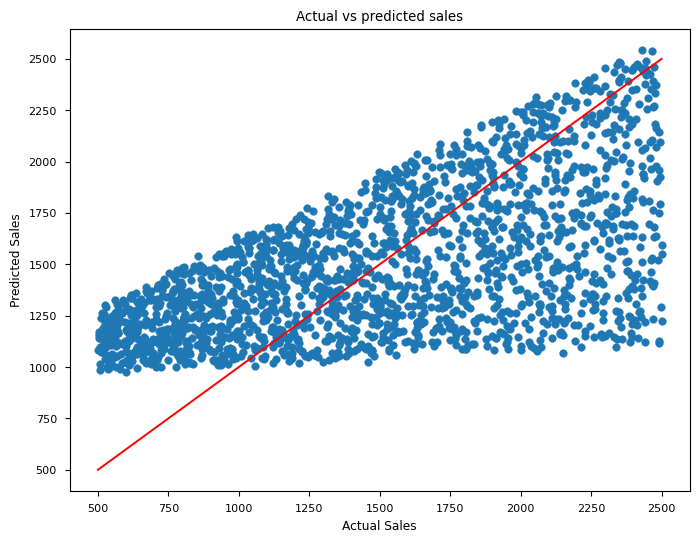

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.title('Actual vs predicted sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color = 'red') # coordinates for plotting red line
plt.show()

The plot shows that the predicted sales are generally higher in the beginning. Eventually, the predicted 'Sales' values started to come around the Linear line (red-line). the model's future predictions may not be totally accurate, but it can be used to have a basic image of how the 'sales' values might come out.

## Preparing dataset for Machine learning
#### to predict the 'Profit' values using other values

- splitting the dataset into training and testing sets
- scaling the feature set


In [32]:
# preparing the features and target for machine learning
features2 = df2.drop(columns=['Order ID','Order Date','Customer Name','Profit','Month','State'])
target2 = df2['Profit']

# splitting the dataset into training and testing set
x2_train, x2_test, y2_train, y2_test = train_test_split(features2, target2, test_size=0.2, random_state=42)

# Scaling the dataset using StandardScaler()
# scaler() was already initialized. so no need to inititalize again
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.fit_transform(x2_test)
features2


,Category,Sub Category,City,Region,Sales,Discount,yr_quarter,Year,month_sin,month_cos
0,5,14,21,2,1254,0.12,4,2017,-8.660254e-01,5.000000e-01
1,1,13,8,3,749,0.18,4,2017,-8.660254e-01,5.000000e-01
2,3,0,13,4,2360,0.21,2,2017,5.000000e-01,-8.660254e-01
3,4,12,4,3,896,0.25,4,2016,-1.000000e+00,-1.836970e-16
4,3,18,12,3,2355,0.26,4,2016,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...
9989,2,9,9,4,945,0.16,4,2015,-5.000000e-01,8.660254e-01
9990,0,1,6,4,1195,0.26,3,2015,1.224647e-16,-1.000000e+00
9991,3,20,0,4,1567,0.16,2,2017,5.000000e-01,-8.660254e-01
9992,5,22,14,4,1659,0.15,4,2018,-1.000000e+00,-1.836970e-16


In [33]:
# using DecisionTreeRegression() for predicting
model.fit(x2_train,y2_train)

y2_pred = model.predict(x2_test)
print(y2_pred)


[130.84731317 326.6170433  297.88315906 ... 409.08356775 214.77978634
 150.19539849]


In [34]:
# Calculate MSE and R-squared
mse2 = mean_squared_error(y2_test, y2_pred)
r22 = r2_score(y2_test, y2_pred)

print(f'Mean Squared Error(profit): {mse2}')
print(f'R-squared(ptofit): {r22}')

Mean Squared Error(profit): 38571.6045392455
R-squared(ptofit): 0.35423070924149047


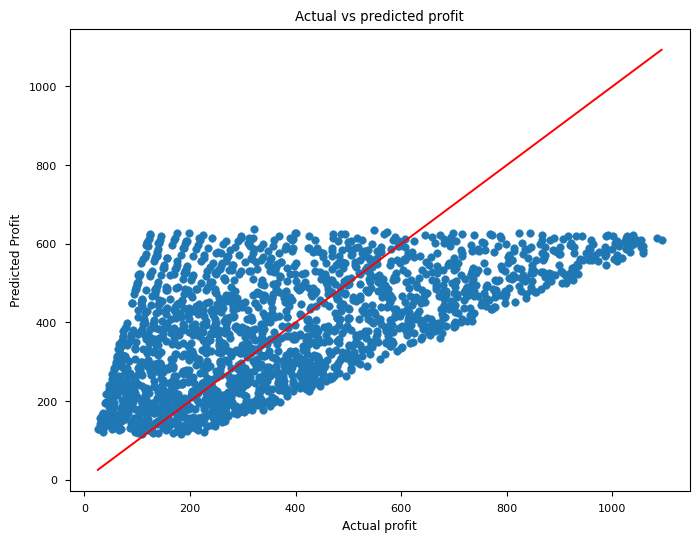

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(y2_test,y2_pred)
plt.title('Actual vs predicted profit')
plt.xlabel('Actual profit')
plt.ylabel('Predicted Profit')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)],color = 'red') # coordinates for plotting red line
plt.show()

From the plot, we can see that the predicted profit hasn't been more than 610$. For more *accurate* predictions, we need more proper data. But the model shows a linear flow in the predictions, which is a good thing